In [364]:
import pandas as pd
import matplotlib.pyplot as plt
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

# Load

In [365]:
fpath="Data/london_weather_MODIFIED - london_weather_MODIFIED.csv"
df = pd.read_csv(fpath)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


# Set `datetime` as Index

In [366]:
# Set the datetime column as the index
#Setting format so date isnt interpreted as minutes
df["datetime"] = pd.to_datetime(df["date"], format="%Y%m%d")
# Set the date column as the index
df = df.set_index("datetime")
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [367]:
#Keep only data from the year 2000 or later
df = df.loc["2000":].copy()
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
2000-01-01,20000101,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,20000102,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,20000103,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,20000104,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,20000105,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


# Drop Columns

In [368]:
#Dropping columns we dont need
df = df.drop(columns=["date", "cloud_cover", "sunshine", "global_radiation", "pressure"])
df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [369]:
#Checking for missing values
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7671, freq=None)

In [370]:
df["precipitation"].describe()

count    7281.000000
mean        1.723376
std         3.675610
min         0.000000
25%         0.000000
50%         0.000000
75%         1.800000
max        51.600000
Name: precipitation, dtype: float64

# Methods for Imputing Null Values with Time Series

## Setting the Frequency

In [371]:
# Setting all the data's frequency to daily
df = df.asfreq('D')
#Preview index to ensure frequence is updated
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7671, freq='D')

# Impute

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Freq: D
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   precipitation  7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [373]:
df["max_temp"] = df["max_temp"].interpolate()
df["max_temp"]

datetime
2000-01-01    10.8
2000-01-02    11.5
2000-01-03     9.5
2000-01-04    11.0
2000-01-05    10.8
              ... 
2020-12-27     7.5
2020-12-28     3.6
2020-12-29     4.1
2020-12-30     5.6
2020-12-31     1.5
Freq: D, Name: max_temp, Length: 7671, dtype: float64

In [374]:
df["mean_temp"] = df["mean_temp"].interpolate()
df["mean_temp"]

datetime
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Freq: D, Name: mean_temp, Length: 7671, dtype: float64

In [375]:
df["min_temp"] = df["min_temp"].interpolate()
df["min_temp"]

datetime
2000-01-01    4.9
2000-01-02    5.0
2000-01-03    7.2
2000-01-04    4.4
2000-01-05    1.9
             ... 
2020-12-27    7.6
2020-12-28   -1.3
2020-12-29    1.1
2020-12-30   -0.1
2020-12-31   -3.1
Freq: D, Name: min_temp, Length: 7671, dtype: float64

In [376]:
# replacing NaNs in precipitation w/Interpolate
df["precipitation"] = df["precipitation"].interpolate()
df["precipitation"]

datetime
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2020-12-27    2.0
2020-12-28    0.2
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Freq: D, Name: precipitation, Length: 7671, dtype: float64

In [377]:
#replacing NaNs in snow_depth(bfill)
df["snow_depth"] = df["snow_depth"].fillna(method='ffill')
df["snow_depth"]

datetime
2000-01-01    0.0
2000-01-02    0.0
2000-01-03    0.0
2000-01-04    0.0
2000-01-05    0.0
             ... 
2020-12-27    0.0
2020-12-28    0.0
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Freq: D, Name: snow_depth, Length: 7671, dtype: float64

In [378]:
#Ensuring all date imputed
df.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

# Use .agg() to Resample Time Series with Multiple Columns using Different Aggregation Methods


##  What month had the most precipitation between 2000 through 2010?

<mark> * October 2000 </mark>

In [443]:
#Slicing out 2000-2010
df_ten_years = df.loc['2000':'2010']
#Setting frequency to 1st of month
df_ten_years = df_ten_years.resample("MS").max()
df_ten_years

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,12.9,11.6,10.4,6.0,0.0
2000-02-01,13.8,10.4,9.1,16.8,0.0
2000-03-01,16.6,13.9,11.2,7.2,0.0
2000-04-01,18.7,13.9,10.2,17.2,0.0
2000-05-01,26.6,21.0,15.4,19.0,0.0
...,...,...,...,...,...
2010-08-01,25.4,21.7,19.1,20.6,0.0
2010-09-01,23.9,19.5,16.4,9.8,0.0
2010-10-01,21.1,17.0,15.2,21.8,0.0


In [444]:
#Using .idxmax() to get max value of precipitation
df_ten_years["precipitation"].idxmax()

Timestamp('2000-10-01 00:00:00', freq='MS')

## Visualizing Precipitation

Customize the major xaxis ticks to:
* Have major xaxis ticks every 1 year.
* Use 4-digit years for the labels
* Rotate the major ticks' labels 90 degrees.

Customize the minor xaxis ticks to:
* Have minor xaxis ticks every 3 months
* Do not label the minor ticks.

In [445]:
## creating our tick locators and formatters
## major ticks
# create the locator to place ticks every 1 year.
loc_years = mdates.YearLocator()
# create the formatter to display 3-letter month names + 2-digit year
fmt_years = mdates.DateFormatter("%Y")
## for minor ticks
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)

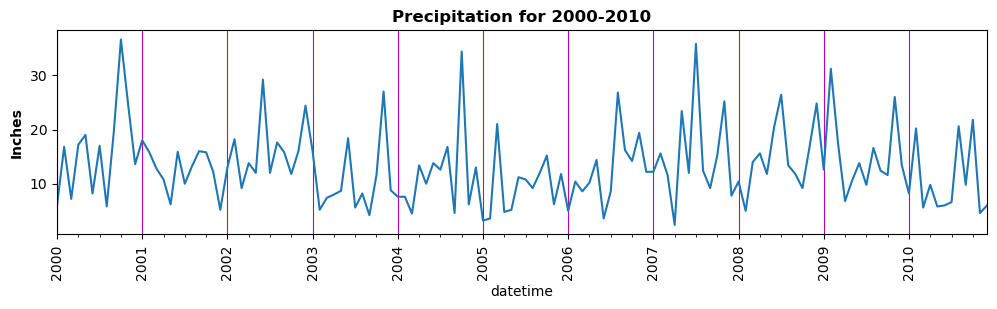

In [446]:
# Plot the feature and time period that corresponds to the question.
fig, ax = plt.subplots(figsize=(12,3))
#plotting just the precipitation feature by year
df_ten_years["precipitation"].plot(ax=ax)
ax.grid(which="major", axis="x", color="m")
#Setting labels
ax.set_ylabel("Inches", fontweight="bold")
ax.set_title("Precipitation for 2000-2010", fontweight="bold")
fig.autofmt_xdate(rotation=90, ha="center");

# Which year between 2000-2020 had the coolest average temperature?

In [449]:
#Slicing out 2000-2010
df_20_years = df.loc['2000':'2020']
#Setting frequency to 1st of month
# group the data by year and then apply the mean() function to calculate the mean for each group.
df_20_years = df_20_years.resample("Y").mean()
df_20_years["min_temp"]

datetime
2000-12-31    8.001503
2001-12-31    7.647397
2002-12-31    8.425890
2003-12-31    7.895890
2004-12-31    8.234563
2005-12-31    7.973562
2006-12-31    8.506301
2007-12-31    8.120137
2008-12-31    7.568852
2009-12-31    7.736164
2010-12-31    6.801370
2011-12-31    8.338219
2012-12-31    7.378005
2013-12-31    7.362603
2014-12-31    8.647534
2015-12-31    8.185753
2016-12-31    7.925820
2017-12-31    8.340959
2018-12-31    8.321918
2019-12-31    7.932055
2020-12-31    8.688798
Freq: A-DEC, Name: min_temp, dtype: float64

In [433]:
df_20_years["min_temp"].idxmin()

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

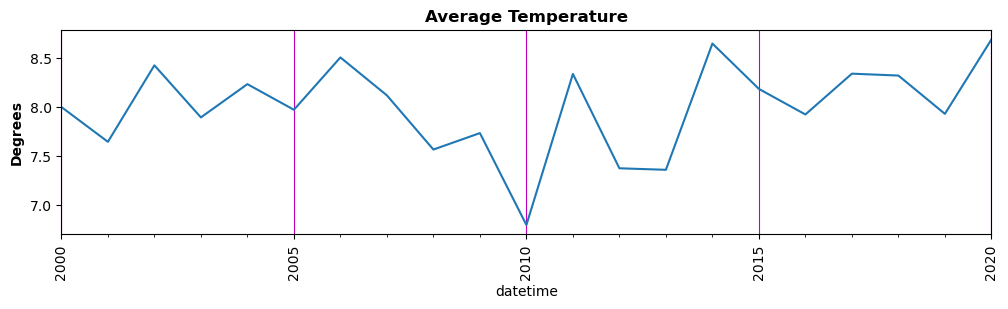

In [450]:
# Plot the feature and time period that corresponds to the question.
fig, ax = plt.subplots(figsize=(12,3))
#plotting just the precipitation feature by year
df_20_years["min_temp"].plot(ax=ax)
ax.grid(which="major", axis="x", color="m")
#Setting labels
ax.set_ylabel("Degrees", fontweight="bold")
ax.set_title("Average Temperature", fontweight="bold")
fig.autofmt_xdate(rotation=90, ha="center");